# Results 
This notebook contains plots for the results of timing Cholesky decomposition with and without pivoting for increasing matrix sizes. 


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [42]:
def read_data(filename):
    matrix_sizes = []
    results = [] 
    with open(filename, 'r') as f: 
        for line in f: 
            data = line.split()
            matrix_sizes.append(int(data[0]))
            results.append(float(data[1]))
    f.close() 
    return matrix_sizes, results

In [43]:
sizes1, chol1_results = read_data('cholesky_times.txt')
sizes2, pivchol_results = read_data('pivoted_cholesky_times.txt')
sizes3, arma_results = read_data('armachol_times.txt')

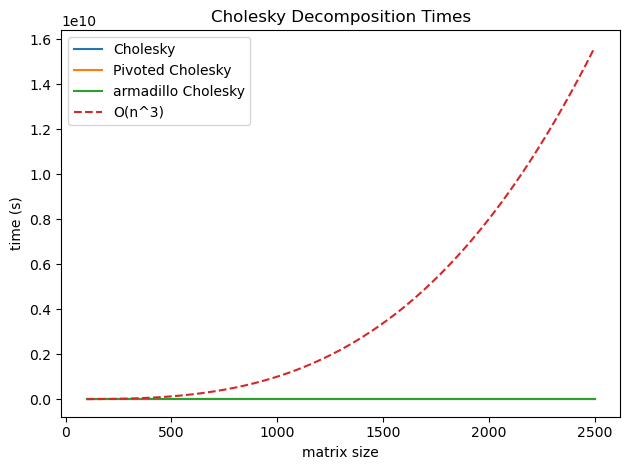

In [44]:
sizes1 == sizes2
n_vals = np.arange(sizes1[0], sizes1[-1])
On3 = n_vals**3
plt.plot(sizes1, chol1_results, label='Cholesky')
plt.plot(sizes2, pivchol_results, label='Pivoted Cholesky')
plt.plot(sizes3, arma_results, label='armadillo Cholesky')
plt.plot(n_vals, On3,label='O(n^3)',linestyle='--' )
plt.xlabel('matrix size')
plt.ylabel('time (s)')
plt.title('Cholesky Decomposition Times')
plt.legend()
plt.tight_layout()
plt.show(); 


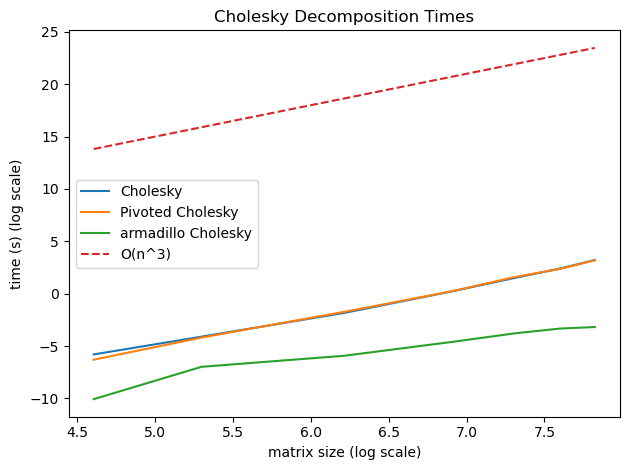

In [45]:
sizes1 == sizes2

plt.plot(np.log(sizes1), np.log(chol1_results), label='Cholesky')
plt.plot(np.log(sizes1), np.log(pivchol_results), label='Pivoted Cholesky')
plt.plot(np.log(sizes1), np.log(arma_results), label='armadillo Cholesky')
plt.plot(np.log(n_vals), np.log(On3),label='O(n^3)',linestyle='--' )
plt.xlabel('matrix size (log scale)')
plt.ylabel('time (s) (log scale)')
plt.title('Cholesky Decomposition Times')
plt.legend()
plt.tight_layout()
plt.show(); 


In [46]:
# error plots
sizes1, chol1_err= read_data('cholesky_error.txt')
sizes2, pivchol_err = read_data('pivoted_cholesky_error.txt')
sizes3, arma_err = read_data('arma_error.txt')

True


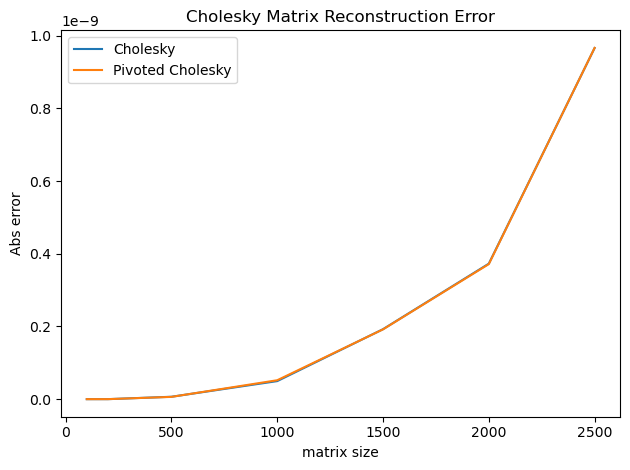

In [52]:
print(sizes1 == sizes2)
plt.plot(sizes1, chol1_err, label='Cholesky')
plt.plot(sizes2, pivchol_err, label='Pivoted Cholesky')
# plt.plot(sizes3, arma_err, label='armadillo Cholesky')
plt.xlabel('matrix size')
plt.ylabel('Abs error')
plt.title('Cholesky Matrix Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show(); 


/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_28043/588232828.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(sizes1), np.log(pivchol_err), label='Pivoted Cholesky')


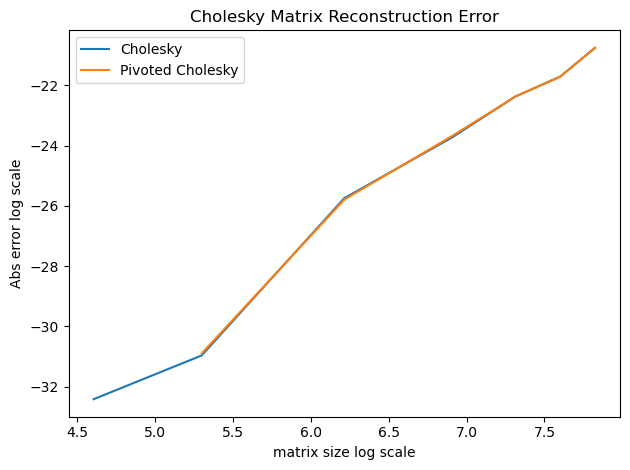

In [51]:
plt.plot(np.log(sizes1), np.log(chol1_err), label='Cholesky')
plt.plot(np.log(sizes1), np.log(pivchol_err), label='Pivoted Cholesky')
# plt.plot(np.log(sizes1), np.log(arma_err), label='armadillo Cholesky')
plt.xlabel('matrix size log scale')
plt.ylabel('Abs error log scale')
plt.title('Cholesky Matrix Reconstruction Error')
plt.legend()
plt.tight_layout()
plt.show(); 